# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize

The following function may be useful for loading the necessary data.

In [2]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [3]:
def gradient(x,y,w, lam, N):
    '''
    returns gradient of log loss given parameters
    '''
    return -y*x/(1+np.e**(y*w.dot(x))) + 2*lam / N * w

In [4]:
def loss(X,Y,w):
    '''
    returns log loss relative to arguments X, Y, w
    '''
    return -np.mean([np.log(1/(1+np.e**(-Y[i]*w.dot(X[i])))) for i in range(len(X))])

In [5]:
def reg_logistic(X, Y, w_start, eta, N_epochs, lam):
    '''
    runs regularized log regression, returns final w
    '''
    w = w_start
    for i in range(N_epochs):
        
        perm = np.random.permutation(range(len(X)))
        for j in perm:
            w -= eta * gradient(X[j],Y[j],w, lam, len(X))
    
    return w

In [6]:
def normalize (X, avs, stdevs):
    '''
    normalizes X to given avs and stdevs
    '''
    return np.array([[(X[i][j]-avs[j])/stdevs[j] for j in range(len(features))] for i in range(len(X))])

In [26]:
# load/format data set 1
data = load_data('data/wine_training1.txt')
Y = [pt[0] for pt in data]
# split by feature for normalization process.
X = [np.array(pt[1:]) for pt in data]
features = [[pt[i] for pt in X] for i in range(len(X[0]))]
X_avs = [np.mean(feature) for feature in features]
X_stdevs = [np.std(feature) for feature in features]
X = normalize(X, X_avs, X_stdevs)

data_test = load_data('data/wine_testing.txt')
Y_test = [pt[0] for pt in data_test]
X_test = [np.array(pt[1:]) for pt in data_test]
X_test = normalize(X_test, X_avs, X_stdevs)


In [18]:
reg_logistic(X,Y, np.zeros(13),5*10**(-4),20000,.00001)

array([-4.40887616, -0.77901817, -1.92729403,  2.22927804, -0.69172418,
       -0.66424213, -0.05808414,  0.17395069,  1.08335683, -1.67666979,
        0.02893555, -0.8417351 , -3.55193215])

In [9]:
lams = [0.00001*5**i for i in range(0,15)]
losses = []
E_outs = []
ws = []
eta = 5*10**(-4)
for lam in lams:
    print (lam)
    w = reg_logistic(X,Y,np.zeros(13),eta,20000, lam)
    losses.append(loss(X,Y,w))
    E_outs.append(loss(X_test, Y_test,w))
    ws.append(np.sqrt(w.dot(w)))

1e-05
5e-05
0.00025
0.00125
0.00625
0.03125
0.15625
0.7812500000000001
3.9062500000000004
19.53125
97.65625000000001
488.28125000000006
2441.40625
12207.031250000002
61035.15625000001


In [10]:
# load/format data set 2
data2 = load_data('data/wine_training2.txt')
Y2 = [pt[0] for pt in data2]
X2 = [np.array(pt[1:]) for pt in data2]
features2 = [[pt[i] for pt in X2] for i in range(len(X2[0]))]
X_avs2 = [np.mean(feature) for feature in features2]
X_stdevs2 = [np.std(feature) for feature in features2]
X2 = normalize(X2, X_avs2, X_stdevs2)

data_test2 = load_data('data/wine_testing.txt')
Y_test2 = [pt[0] for pt in data_test2]
X_test2 = [np.array(pt[1:]) for pt in data_test2]
X_test2 = normalize(X_test2, X_avs2, X_stdevs2)

In [11]:
lams2 = [0.00001*5**i for i in range(0,15)]
losses2 = []
E_outs2 = []
ws2 = []
eta = 5*10**(-4)
for lam in lams2:
    print(lam)
    w = reg_logistic(X2,Y2,np.zeros(13),eta,20000, lam)
    losses2.append(loss(X2,Y2,w))
    E_outs2.append(loss(X_test, Y_test,w))
    ws2.append(np.sqrt(w.dot(w)))

[1e-05, 5e-05, 0.00025, 0.00125, 0.00625, 0.03125, 0.15625, 0.7812500000000001, 3.9062500000000004, 19.53125, 97.65625000000001, 488.28125000000006, 2441.40625, 12207.031250000002, 61035.15625000001]
1e-05
5e-05
0.00025
0.00125
0.00625
0.03125
0.15625
0.7812500000000001
3.9062500000000004
19.53125
97.65625000000001
488.28125000000006
2441.40625
12207.031250000002
61035.15625000001


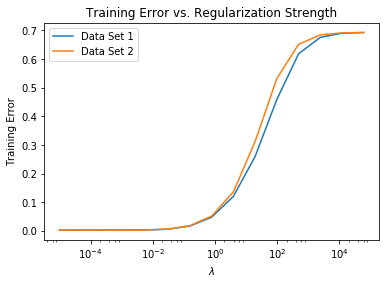

In [12]:
plt.plot(lams, losses, label = 'Data Set 1')
plt.plot(lams, losses2, label = 'Data Set 2')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Training Error')
plt.title('Training Error vs. Regularization Strength')
plt.legend()

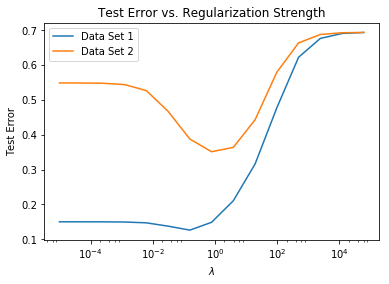

In [13]:
plt.plot(lams, E_outs, label = 'Data Set 1')
plt.plot(lams, E_outs2, label = 'Data Set 2')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Test Error')
plt.title('Test Error vs. Regularization Strength')
plt.legend()

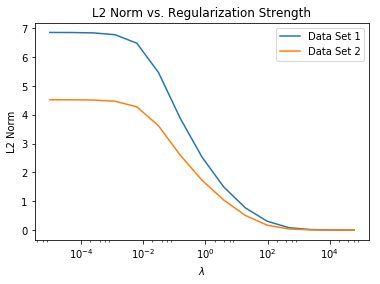

In [14]:
plt.plot(lams, ws, label = 'Data Set 1')
plt.plot(lams, ws2, label = 'Data Set 2')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('L2 Norm')
plt.title('L2 Norm vs. Regularization Strength')
plt.legend()